In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data_path="../Datasets/Financial data/NIFTY 50_Historical_PR_01012010to23072024.csv"
df = pd.read_csv(data_path,
                 index_col='Date',
                 parse_dates=['Date'],)

In [22]:
df.head() #top 5 data-items

,Index Name,Open,High,Low,Close,Time
Date,,,,,,
2024-07-22,NIFTY 50,24445.75,24595.20,24362.30,24509.25,0
2024-07-19,NIFTY 50,24853.80,24854.80,24508.15,24530.90,1
2024-07-18,NIFTY 50,24543.80,24837.75,24504.45,24800.85,2
2024-07-16,NIFTY 50,24615.90,24661.25,24587.65,24613.00,3
2024-07-15,NIFTY 50,24587.60,24635.05,24522.75,24586.70,4


## Add Range

The difference between the high and low prices of a stock or any financial instrument is commonly referred to as the "trading range" or simply "range".

### Definition: 
The trading range represents the difference between the highest price (high) and the lowest price (low) at which a stock or financial instrument traded during a specific period, typically within a day (intraday trading range) or over a longer timeframe (daily, weekly, etc.).

### Significance: 
Understanding the trading range provides insights into the volatility and price movements of the instrument. A wider trading range generally indicates higher volatility, while a narrower range may suggest more stable price movements.

In [39]:
df['Range']=df['High']-df['Low']
df.head()

,Index Name,Open,High,Low,Close,Time,Range
Date,,,,,,,
2024-07-22,NIFTY 50,24445.75,24595.20,24362.30,24509.25,0,232.90
2024-07-19,NIFTY 50,24853.80,24854.80,24508.15,24530.90,1,346.65
2024-07-18,NIFTY 50,24543.80,24837.75,24504.45,24800.85,2,333.30
2024-07-16,NIFTY 50,24615.90,24661.25,24587.65,24613.00,3,73.60
2024-07-15,NIFTY 50,24587.60,24635.05,24522.75,24586.70,4,112.30


## Sorting by Date

To make the latest date last and the earliest date first.

In [40]:
df_sorted = df.sort_values(by='Date')

df_sorted.head()

,Index Name,Open,High,Low,Close,Time,Range
Date,,,,,,,
2010-01-04,NIFTY 50,5200.90,5238.45,5167.10,5232.20,3609,71.35
2010-01-05,NIFTY 50,5277.15,5288.35,5242.40,5277.90,3608,45.95
2010-01-06,NIFTY 50,5278.15,5310.85,5260.05,5281.80,3607,50.80
2010-01-07,NIFTY 50,5281.80,5302.55,5244.75,5263.10,3606,57.80
2010-01-08,NIFTY 50,5264.25,5276.75,5234.70,5244.75,3605,42.05


In [41]:
df_sorted['Time'] = np.arange(len(df.index))

df_sorted.head()

,Index Name,Open,High,Low,Close,Time,Range
Date,,,,,,,
2010-01-04,NIFTY 50,5200.90,5238.45,5167.10,5232.20,0,71.35
2010-01-05,NIFTY 50,5277.15,5288.35,5242.40,5277.90,1,45.95
2010-01-06,NIFTY 50,5278.15,5310.85,5260.05,5281.80,2,50.80
2010-01-07,NIFTY 50,5281.80,5302.55,5244.75,5263.10,3,57.80
2010-01-08,NIFTY 50,5264.25,5276.75,5234.70,5244.75,4,42.05


In [46]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

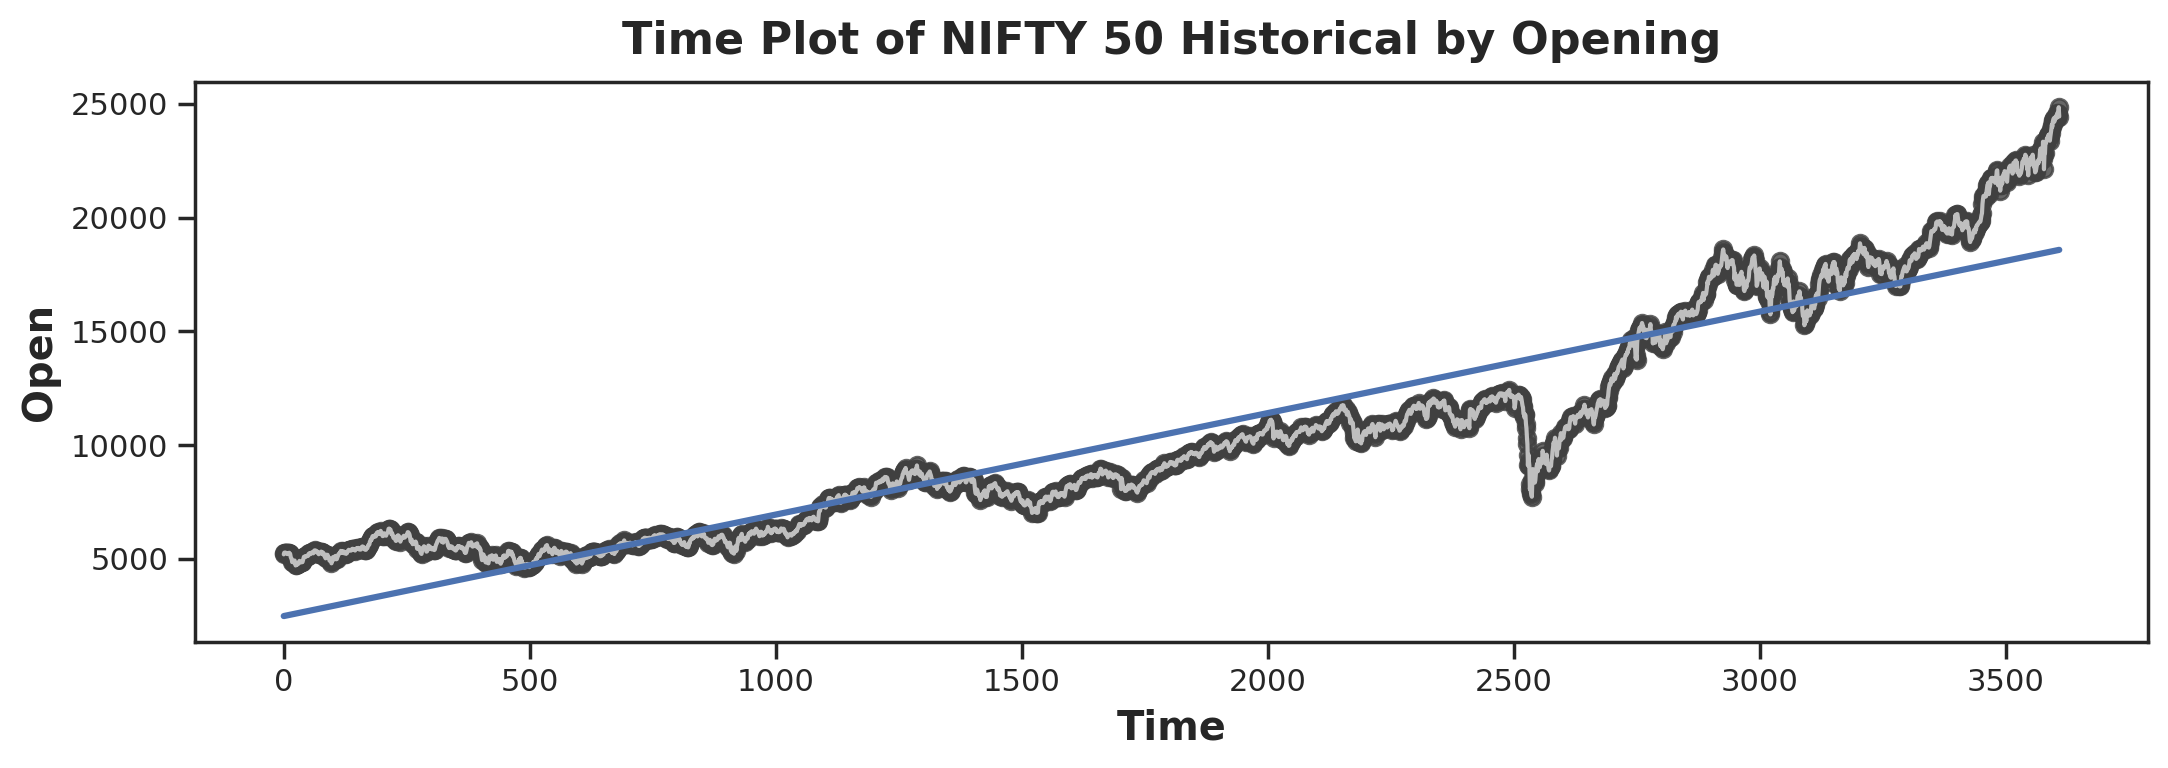

In [47]:
fig, ax = plt.subplots()
ax.plot('Time', 'Open', data=df_sorted, color='0.75')
ax = sns.regplot(x='Time', y='Open', data=df_sorted, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of NIFTY 50 Historical by Opening');

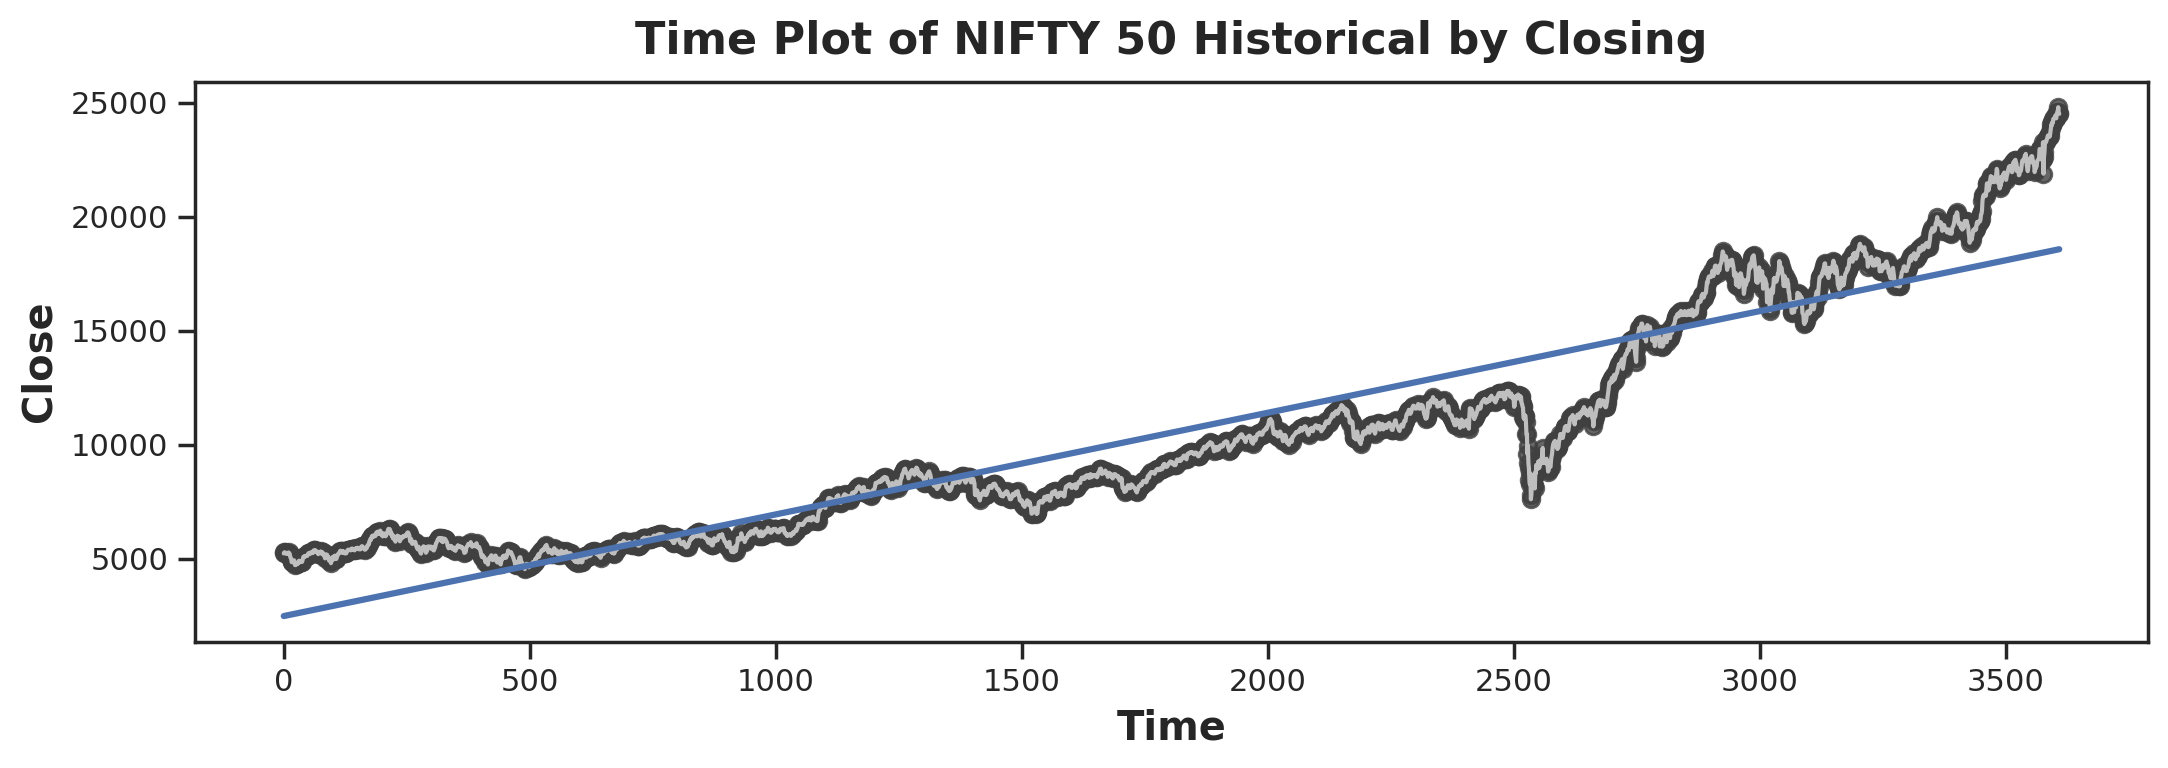

In [48]:
fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=df_sorted, color='0.75')
ax = sns.regplot(x='Time', y='Close', data=df_sorted, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of NIFTY 50 Historical by Closing');

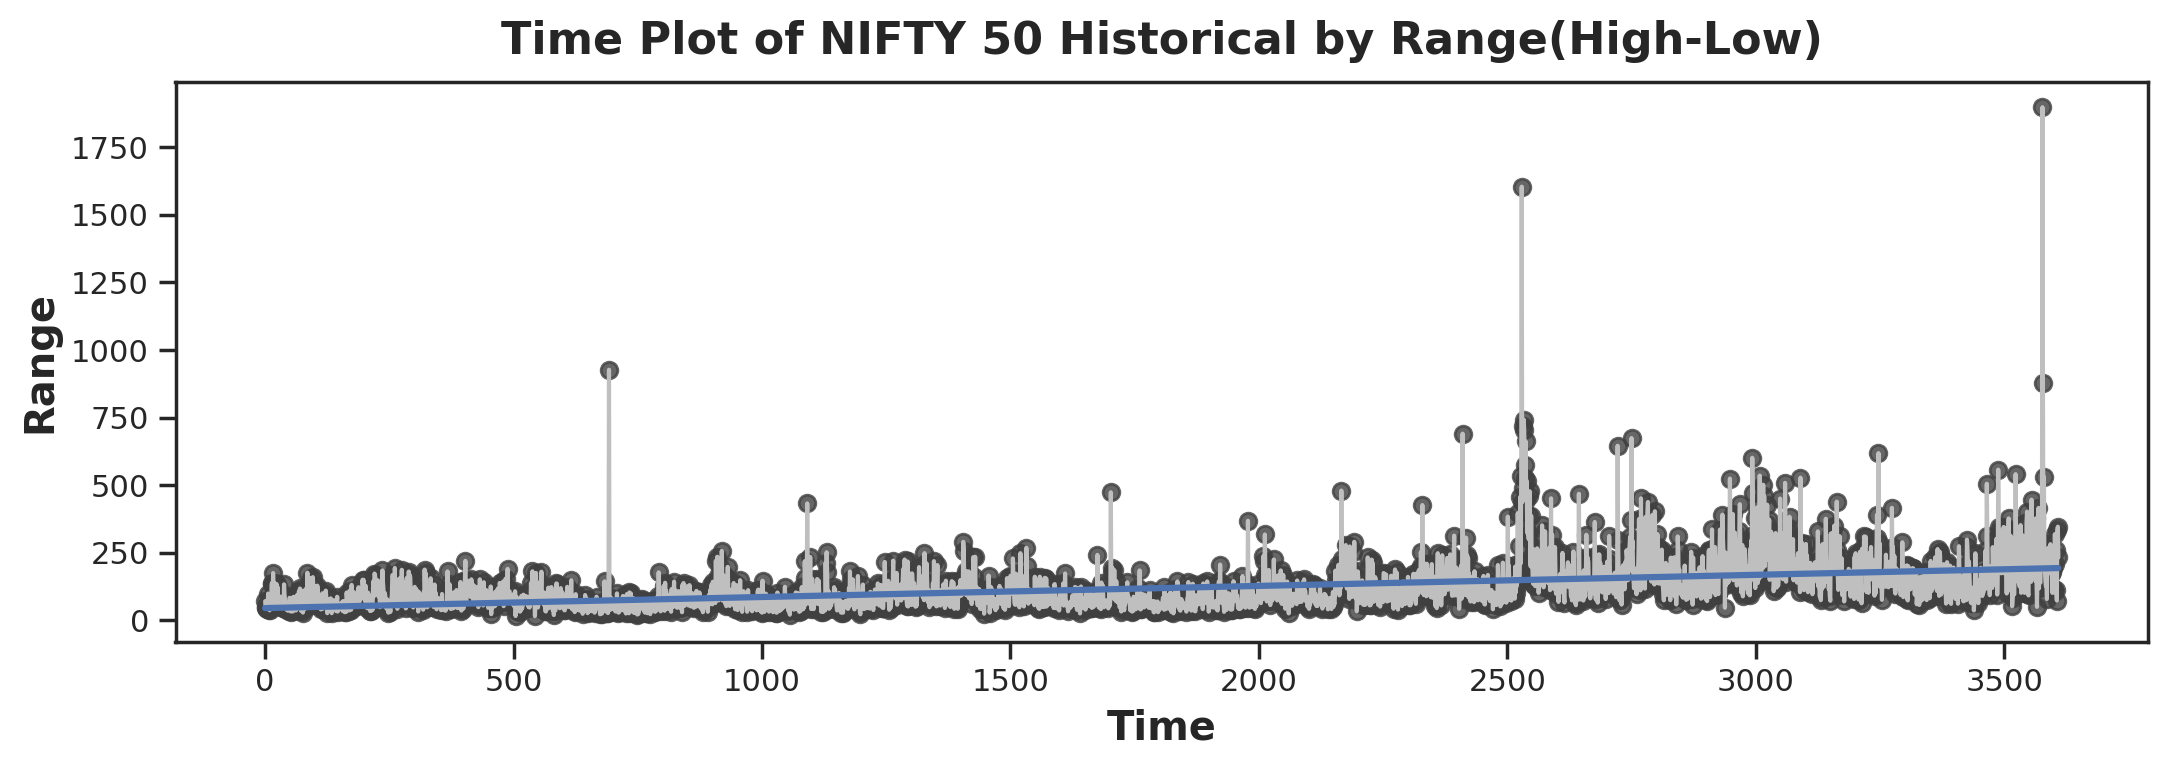

In [49]:
fig, ax = plt.subplots()
ax.plot('Time', 'Range', data=df_sorted, color='0.75')
ax = sns.regplot(x='Time', y='Range', data=df_sorted, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of NIFTY 50 Historical by Range(High-Low)');

In [62]:
df_sorted['Lag_1'] = df_sorted['Close'].shift(1)
df_lag1 = df_sorted.reindex(columns=['Close', 'Lag_1', 'Time'])

df_lag1.head()

,Close,Lag_1,Time
Date,,,
2010-01-04,5232.20,NaN,0
2010-01-05,5277.90,5232.2,1
2010-01-06,5281.80,5277.9,2
2010-01-07,5263.10,5281.8,3
2010-01-08,5244.75,5263.1,4


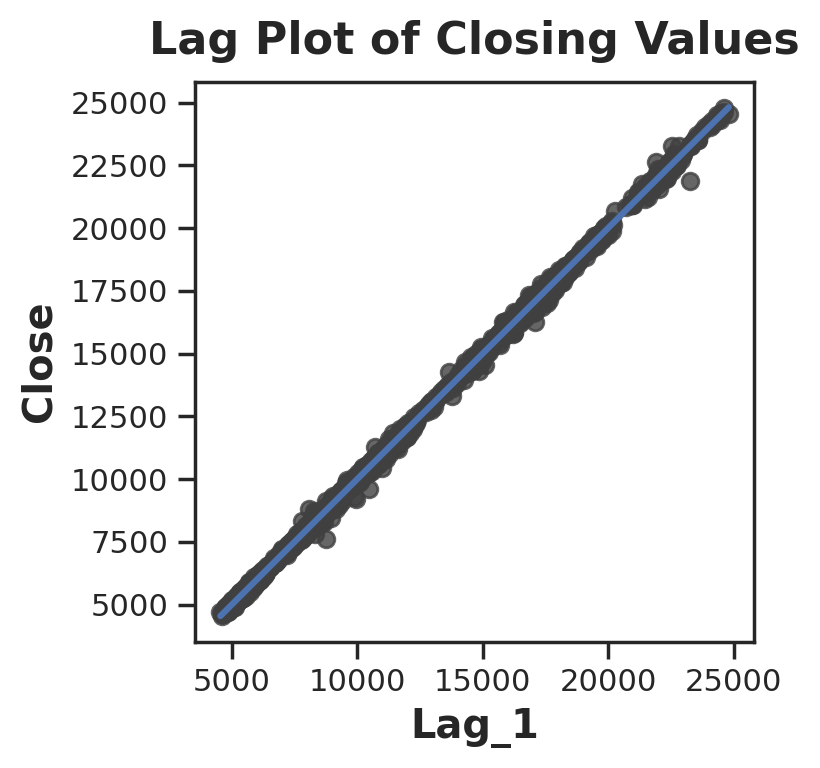

In [63]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Close', data=df_lag1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Closing Values');

In [66]:
from sklearn.linear_model import LinearRegression

# Training data
X = df_lag1.loc[:, ['Time']]  # features
y = df_lag1.loc[:, 'Close']  # target

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

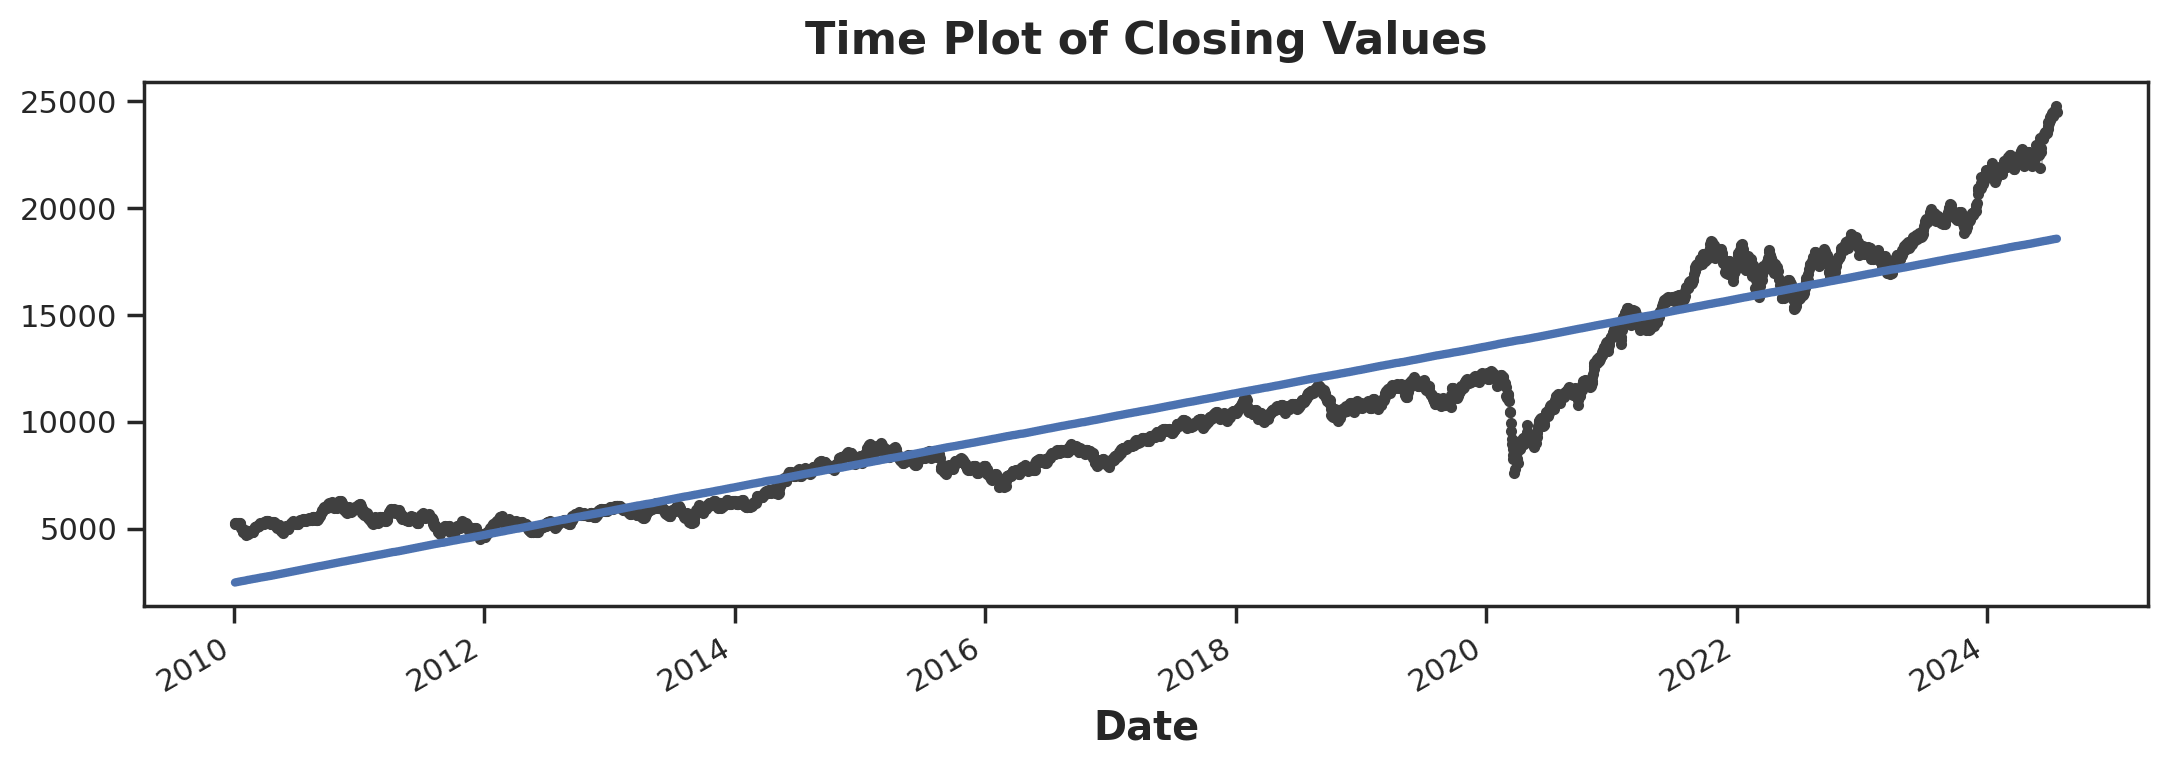

In [67]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Closing Values');

In [68]:
X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

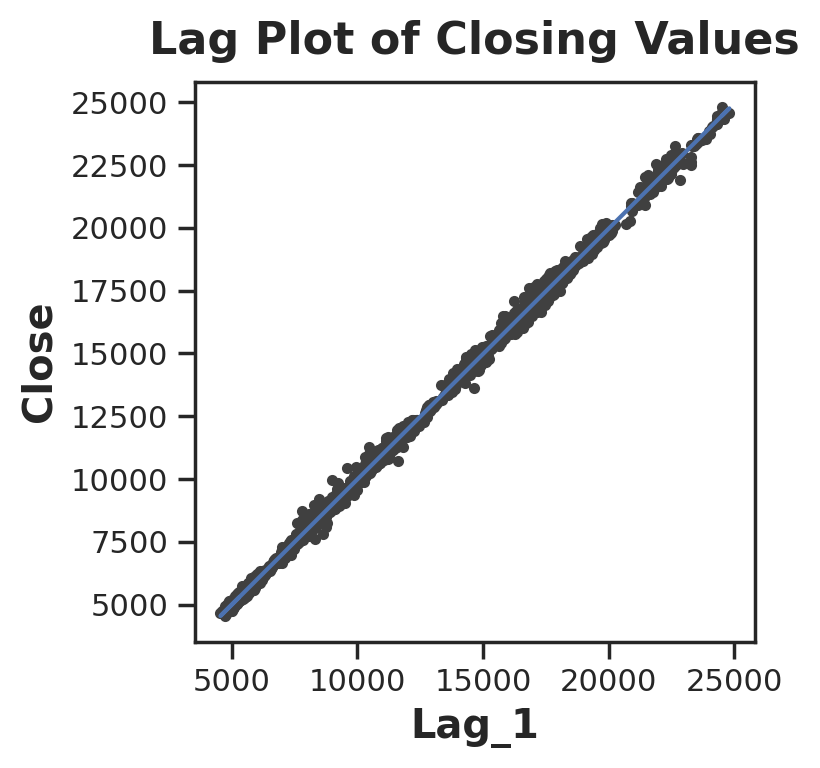

In [69]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Close')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Closing Values');

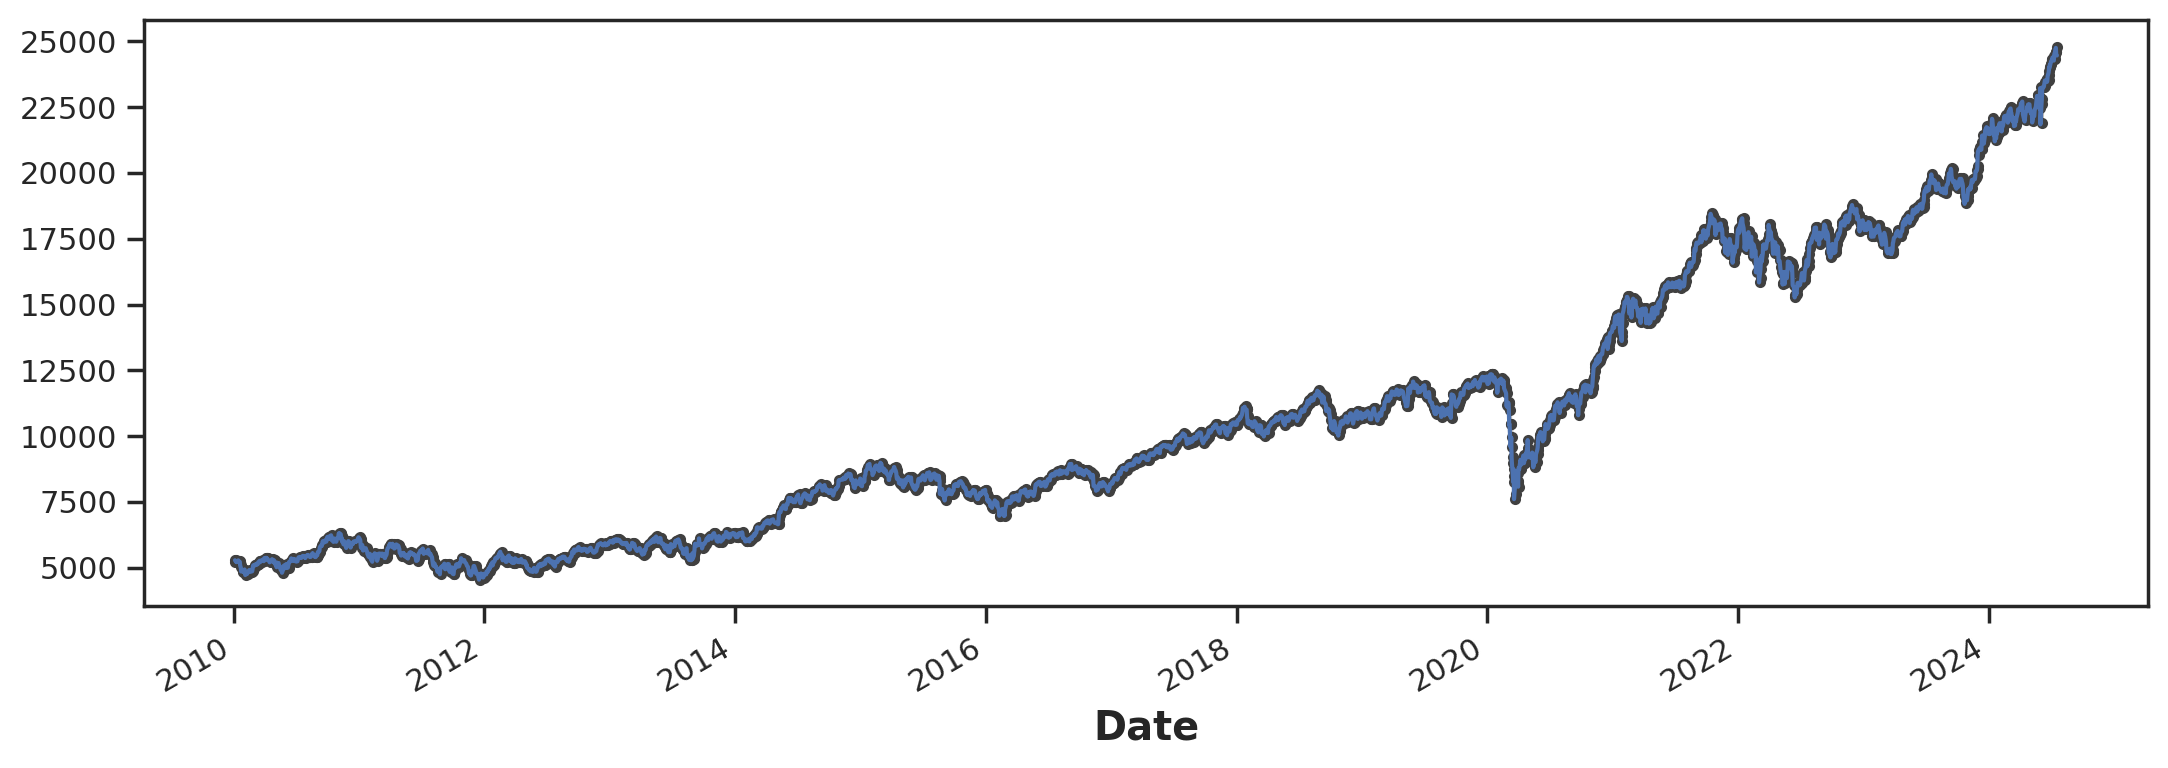

In [70]:
ax = y.plot(**plot_params)
ax = y_pred.plot()